In [1]:
import sys
import posydon
import os
import numpy as np
import astropy.constants as con
import astropy.units as unt
import matplotlib.pyplot as plt
import h5py
from astropy.io import fits

# Set paths & import pymsg

MSG_DIR = os.environ['MSG_DIR']

sys.path.insert(0, os.path.join(MSG_DIR, 'python'))
import pymsg

# Set plot parameters

%matplotlib inline
plt.rcParams.update({'font.size': 16})

<frozen importlib._bootstrap>:241: RuntimeWarning: compiletime version 3.9 of module 'pycmsg' does not match runtime version 3.1
<frozen importlib._bootstrap>:241: RuntimeWarning: builtins.type size changed, may indicate binary incompatibility. Expected 880 from C header, got 888 from PyObject


In [2]:
# Load the SpecGrid

GRID_DIR = os.path.join(MSG_DIR, 'data', 'grids')

specgrid_file_normal = os.path.join(GRID_DIR, 'sg-CAP18-coarse.h5')

specgrid = pymsg.SpecGrid(specgrid_file_normal)

specgrid_file_stripped = os.path.join(GRID_DIR, 'sg-Gotberg18.h5')

specgrid2 = pymsg.SpecGrid(specgrid_file_stripped)

In [3]:
# Inspect grid parameters

print('Grid parameters:')

for label in specgrid.axis_labels:
    print(f'  {label} [{specgrid.axis_x_min[label]} -> {specgrid.axis_x_max[label]}]')

print(f'  lam [{specgrid.lam_min} -> {specgrid.lam_max}]')

Grid parameters:
  Teff [3500.0 -> 30000.0]
  [Fe/H] [-5.0 -> 0.5]
  log(g) [0.0 -> 5.0]
  lam [1299.9747946207876 -> 65002.50442467493]


In [4]:
#Setting up the wavelength parameters
lam_min = 1300.
lam_max = 6000.
lam = np.linspace(lam_min, lam_max, 1000)
lam_c = 0.5*(lam[1:] + lam[:-1])

In [5]:
M = 2.02 *con.M_sun
R = 1.711 * con.R_sun
L = 25.4 * con.L_sun

#Teff = (L/(4*np.pi*R**2*con.sigma_sb))**0.25/unt.K
#logg = np.log10(con.G*M/R**2/(unt.cm/unt.s**2))
Teff = 5298
logg = 2.98
Fe_H = -1.99
x = {'Teff': Teff,'log(g)': logg}

print(Teff,np.log10(Teff))

5298 3.7241119539612124


0.00016347527876343408


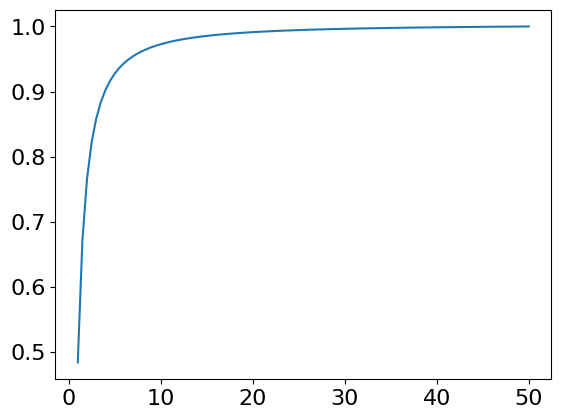

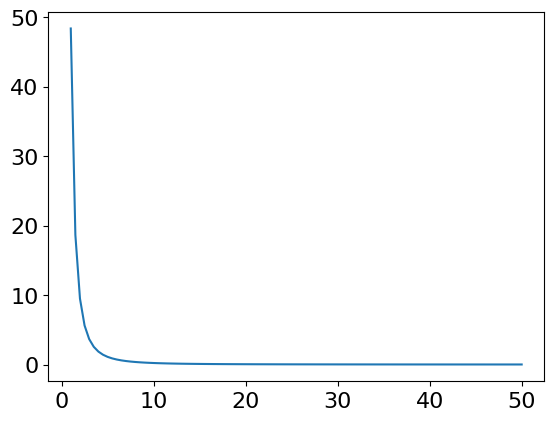

In [6]:
# Create probability function for masses: 

def prob(M):
    prob = M**(-2.35)
    return prob 

#Number of total masses: 

stars_total = 100
x_mass = np.linspace(1,50,99)

def norm_prob(x):
    norm_prob = prob(x)/np.sum(prob(x_mass))
    return norm_prob
print(norm_prob(30))

cdf = np.cumsum(norm_prob(x_mass))

fig=plt.figure()
plt.plot(x_mass,cdf)
fig2=plt.figure()
plt.plot(x_mass, 100*norm_prob(x_mass))

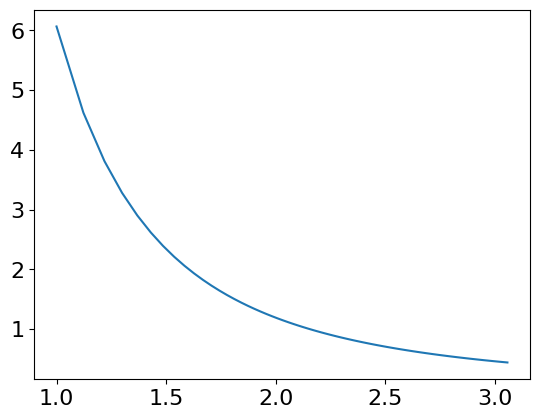

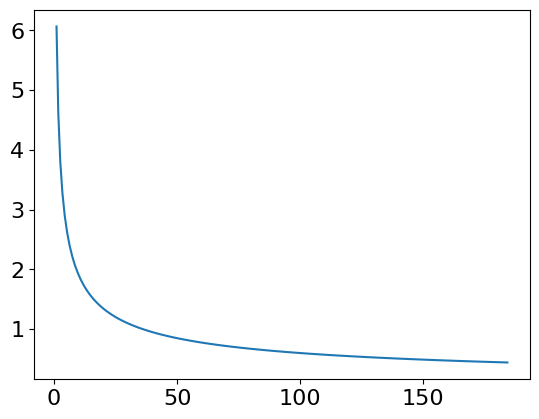

In [7]:
# The distributions for L,R:


def prob_L(x):
    prob_L = x**(-2.35/3.5)
    return prob_L

def norm_prob_L(x):
    norm_prob_L = prob_L(x)/np.sum(prob_L(x_mass))
    return norm_prob_L

def prob_R(x):
    prob_R = x**(-2.35/0.75)
    return prob_R

def norm_prob_R(X):
    norm_prob_R = prob_R(x)/np.sum(prob_R(x_mass))
    return norm_prob_R


fig2=plt.figure()
plt.plot(x_mass**(1/3.5), 100*norm_prob_L(x_mass))
fig3=plt.figure()
plt.plot(x_mass**(1/0.75), 100*norm_prob_L(x_mass))


FileNotFoundError: [Errno 2] No such file or directory: 'csv_file'

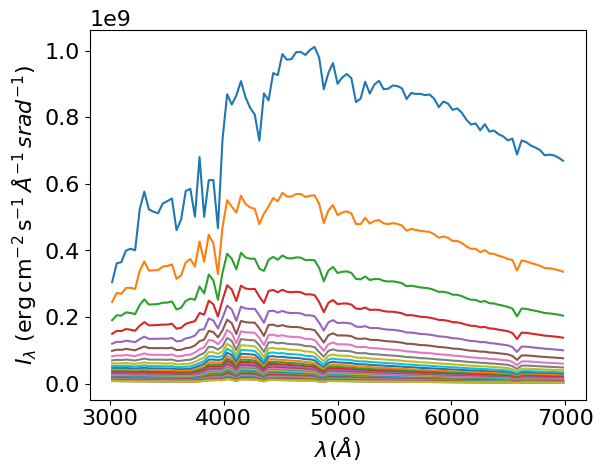

In [8]:
F_total = 0
for i in x_mass:
    num_stars=(prob(i))*100
    M = i *con.M_sun
    R = i**(1/3.5)* con.R_sun
    L = i**(1/0.75)* con.L_sun
    Teff = (L/(4*np.pi*R**2*con.sigma_sb))**0.25/unt.K
    logg = np.log10(con.G*M/R**2/(unt.cm/unt.s**2))
    if logg < 5:
        x = {'Teff': Teff,'log(g)': logg}
        #if num_stars >= 0.9:
        F_not = specgrid.flux(x, lam)
        F_lam = np.asarray(F_not)
        plt.plot(lam_c,F_lam*num_stars)
        F_total =  F_total + F_lam*num_stars    
plt.xlabel(r'$\lambda ({\AA})$')
plt.ylabel(r'$I_{\lambda}\ ({\rm erg\,cm^{-2}\,s^{-1}}\,\AA^{-1}\,srad^{-1})$')     

f = open('csv_file', 'r')

Text(0.5, 1.0, 'Total spectrum')

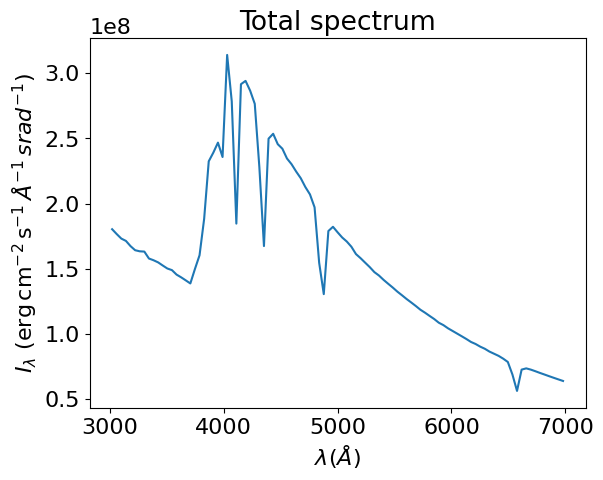

In [18]:
#plt.plot(lam_c, F_total,label='population')
plt.plot(lam_c,F_lam*2)
plt.xlabel(r'$\lambda ({\AA})$')
plt.ylabel(r'$I_{\lambda}\ ({\rm erg\,cm^{-2}\,s^{-1}}\,\AA^{-1}\,srad^{-1})$')     
plt.title('Total spectrum')

19103.893657665038
7.275433754830158e+30 W
2.6906426164630863


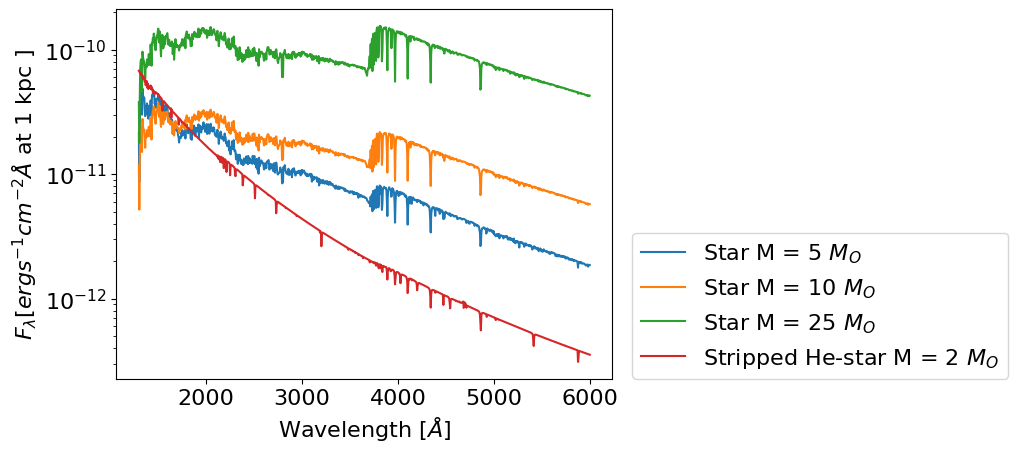

In [8]:
Fe_H = 0.0142
kpc = 3.08e19*unt.m
######################################################################################
M1 = 5.0 * con.M_sun
R1 = 5* con.R_sun
L1 = 3000* con.L_sun
Teff1 = (L1/(4*np.pi*R1**2*con.sigma_sb))**0.25/unt.K
logg1 = np.log10(con.G*M1/R1**2/(unt.cm/unt.s**2))
x1 = {'Teff': Teff1,'log(g)': logg1,'[Fe/H]':Fe_H}
print(Teff1)
F_not1 = specgrid.flux(x1, lam)
F_lam1 = np.asarray(F_not1*R1**2*kpc**-2)

######################################################################################33
M2 = 10 *con.M_sun
R2 = 2**(1/0.8)*R1
L2 = (2)**(1/3.5) *L1
Teff2 = (L2/(4*np.pi*R2**2*con.sigma_sb))**0.25/unt.K
logg2 = np.log10(con.G*M2/R2**2/(unt.cm/unt.s**2))
x2 = {'Teff': Teff2,'log(g)': logg2,'[Fe/H]':Fe_H}
F_not2 = specgrid.flux(x2, lam)
F_lam2 = np.asarray(F_not2*R2**2*kpc**-2)
#########################################################################
M3 = 25 * con.M_sun
R3 = 5**(1/0.8)*R1
L3 = (5)**(1/3.5) * L1*4
print(L3)
Teff3 = (L3/(4*np.pi*R3**2*con.sigma_sb))**0.25/unt.K
logg3 = np.log10(con.G*M3/R3**2/(unt.cm/unt.s**2))
print(logg3)
x3 = {'Teff': Teff3,'log(g)': logg3,'[Fe/H]':Fe_H}
F_not3 = specgrid.flux(x3, lam)
F_lam3 = np.asarray(F_not3*R3**2*kpc**-2)
#######################################################################
M4 = 8
x4 = {'M_init': M4,'Z': Fe_H}
F_not4 = specgrid2.flux(x4,lam)
F_lam4 = np.asarray(F_not4)
##########################################################

plt.plot(lam_c,F_lam1,label='Star M = 5 $M_O$')
plt.plot(lam_c,F_lam2,label='Star M = 10 $M_O$')
plt.plot(lam_c,F_lam3,label='Star M = 25 $M_O$')
plt.plot(lam_c,F_lam4,label='Stripped He-star M = 2 $M_O$')
plt.ylabel("$ F_\lambda [erg s^{-1} cm^{-2} \AA  $ at 1 kpc ]")
plt.xlabel("Wavelength [$ \AA $]")
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
plt.show()

In [ ]:
##################################Old version for calculating spectra##############################################
#total_binary_number = len(grid.final_values['model_number'])
#Look up in posydon code what is the final mass, radius, and L 
#Create another function that is going to calcualte the mass, radius and luminosity giving Teff, logg and Fe_H 
def create_spectrum_single(binary_number,star_number, **kwargs):
    Fe_H = 0.0142
    Teff = create_Teff(binary_number,star_number)
    logg = create_logg(binary_number,star_number)
    x = {'Teff':Teff ,'log(g)': logg,'[Fe/H]':Fe_H}
    F_not = specgrid.flux(x, lam)
    #if statement for the stripped stars:
    F_lam = np.asarray(F_not)
    create_spectrum_single = F_lam
    return create_spectrum_single 

def add_spectra(spectrum_1,spectrum_2):
    add_spectra = spectrum_1 + spectrum_2
    return add_spectra
    
def create_spectrum_binary(binary_number):
    # check if binary has two non-degenerate stars
    if star_state(binary_number,1) not in ['NS', 'BH','Failed']:
        spectrum_1 = create_spectrum_single(binary_number,1)
    else:
        spectrum_1 = F_empty
    if star_state(binary_number,2) not in ['NS', 'BH','Failed']:
        spectrum_2 = create_spectrum_single(binary_number,2)
    else: 
        spectrum_2 =F_empty
    return add_spectra(spectrum_1, spectrum_2)
    
def create_spectrum_population(total_binary_number):
    spectrum_population = F_empty*0
    index = 0
    for binary_number in range(0,total_binary_number):
        try:
            spectrum_population += create_spectrum_binary(binary_number)
        except:
            index +=1
            print(index,binary_number,"S1",
                  create_Teff(binary_number,1),
                  create_logg(binary_number,1),
                  "S2",
                  create_Teff(binary_number,2),
                  create_logg(binary_number,2))
            
    return spectrum_population
